# Import Modules

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

# Create Data Directory Variables And List of Labels

In [5]:
DATADIR_Train = 'train'
DATADIR_Test = 'test'
IMG_SIZE = 128
label_list = ['0L', '1L', '2L', '3L', '4L', '5L', '0R', '1R', '2R', '3R', '4R', '5R']

# Fetch Training and Testing Datasets

In [3]:
training_data = []
test_data = []


for train_img in os.listdir(DATADIR_Train):
    label_str = train_img[-5: -7: -1][::-1]
    label = label_list.index(label_str)
    img = cv2.imread(os.path.join(DATADIR_Train, train_img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    training_data.append([img, label])
    
for test_img in os.listdir(DATADIR_Test):
    label_str = test_img[-5: -7: -1][::-1]
    label = label_list.index(label_str)
    img = cv2.imread(os.path.join(DATADIR_Test, test_img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_data.append([img, label])

# Print Length of Datasets

In [4]:
print("Training Data :",len(training_data))
print("Test Data :",len(test_data))

Training Data : 18000
Test Data : 3600


# Check Training Data

0L


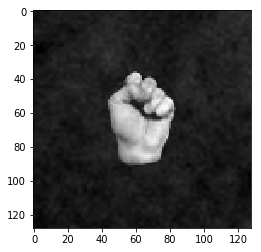

In [5]:
plt.imshow(training_data[0][0], cmap = 'gray')
print(label_list[training_data[0][1]])

# Check Test Data

5L


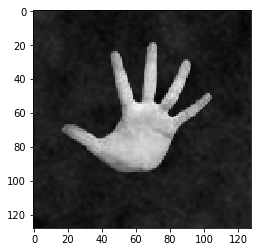

In [6]:
plt.imshow(test_data[0][0], cmap = 'gray')
print(label_list[test_data[0][1]])

# Check Shape of Training Data

In [7]:
training_data[0][0].shape

(128, 128)

# Shuffle Training and Testing Data

In [8]:
random.shuffle(training_data)
random.shuffle(test_data)

# Separate Feature and Label from Training and Testing Data

In [9]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in training_data:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)

# Check Length of Features and Labels

In [10]:
print("x_train : ", len(x_train))
print("y_train : ", len(y_train))
print("x_test : ", len(x_test))
print("y_test : ", len(y_test))

x_train :  18000
y_train :  18000
x_test :  3600
y_test :  3600


# Reshape Image

In [11]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Scaling Image

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

# Define Model using tensorflow keras

In [13]:
model = Sequential()

# First Layer
model.add(   Conv2D(64,  (3, 3), input_shape = x_train.shape[1:])   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Second Layer
model.add(   Conv2D(64,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Third Layer
model.add(Flatten())
model.add(Dense(64))
model.add( Activation('relu') )

# Output Layer
model.add(Dense(12))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


# Compile Model

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'RMSprop',
             metrics = ['accuracy'])

# Train Model

In [15]:
model.fit(x_train, y_train, batch_size = 32, epochs=3, validation_data = (x_test, y_test))

Train on 18000 samples, validate on 3600 samples
Epoch 1/3
18000/18000 [==============================] - 53s 3ms/sample - loss: 0.1792 - acc: 0.9463 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 2/3
18000/18000 [==============================] - 36s 2ms/sample - loss: 0.0049 - acc: 0.9987 - val_loss: 1.5632e-05 - val_acc: 1.0000
Epoch 3/3
18000/18000 [==============================] - 36s 2ms/sample - loss: 7.0720e-04 - acc: 0.9998 - val_loss: 1.5950e-06 - val_acc: 1.0000


# Save Model

In [16]:
model.save('Fingers_Detection_CNN_Tensorflow_Keras.model')

# Testing

# Load Model

In [2]:
model = tf.keras.models.load_model('Fingers_Detection_CNN_Tensorflow_Keras.model')

Instructions for updating:
Colocations handled automatically by placer.


# Preprocessing Image for Prediction

In [33]:
def prepare(filepath):
    IMG_SIZE = 128
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    reshape_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return reshape_array

# Testing Model Directory

In [29]:
DATADIR_Test_Model = 'Testing Model/'

# Make Prediction

In [32]:
for test_model in os.listdir(DATADIR_Test_Model):
    path = os.path.join(DATADIR_Test_Model, test_model)
    image = prepare(path)
    prediction = model.predict([image])
    print("File-Name :", test_model)
    print("Prediction :", label_list[prediction[0].argmax()])
    print()

File-Name : 0L.png
Prediction : 0L

File-Name : 0R.png
Prediction : 0L

File-Name : 1L.png
Prediction : 1L

File-Name : 1R.png
Prediction : 1R

File-Name : 2L.png
Prediction : 2L

File-Name : 2R.png
Prediction : 2R

File-Name : 3L.png
Prediction : 3L

File-Name : 3R.png
Prediction : 3R

File-Name : 4L.png
Prediction : 4L

File-Name : 4R.png
Prediction : 4R

File-Name : 5L.png
Prediction : 5L

File-Name : 5R.png
Prediction : 5R

